<a href="https://colab.research.google.com/github/Timothydatasciencegit/Data-Science-Code/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd #dataframe operations
import numpy as np #arrays and math functions
from google.colab import drive
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
pagedf = pd.read_csv('/content/drive/MyDrive/fcc-forum-pageviews.csv',parse_dates = ['date'], index_col = "date") #read in page data, parse date and make it the index (index varaible becomes row labels)
pagedf.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [9]:
pagedf = pagedf[
    (pagedf['value'] >= pagedf['value'].quantile(0.025)) &
    (pagedf['value'] <= pagedf['value'].quantile(0.975))
]

#Clean data by filtering out days when page views were in the top 2.5% of the dataset or
#bottom 2.5% of the dataset

In [12]:
def draw_line_plot(x):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(x.index, x['value'], 'r', linewidth=1) #grabs the index as the x and value as the y. r stands for red

  ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  ax.set_xlabel('Date')
  ax.set_ylabel('Page Views')


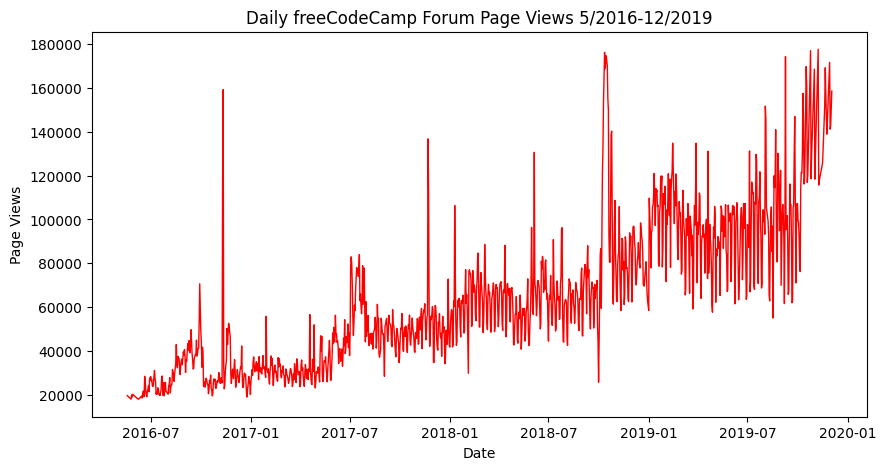

In [13]:
draw_line_plot(pagedf)

In [16]:
def draw_bar_plot(x):
  x['month'] = x.index.month
  x['year'] = x.index.year

  df_bar = x.groupby(['year', 'month'])['value'].mean() #group by year and month and average value is on the y axis
  df_bar = df_bar.unstack()

  fig = df_bar.plot.bar(legend=True, figsize = (15,5), ylabel ='Average Page Views', xlabel='Years').figure
  plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])
#Legend shows month labels
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)

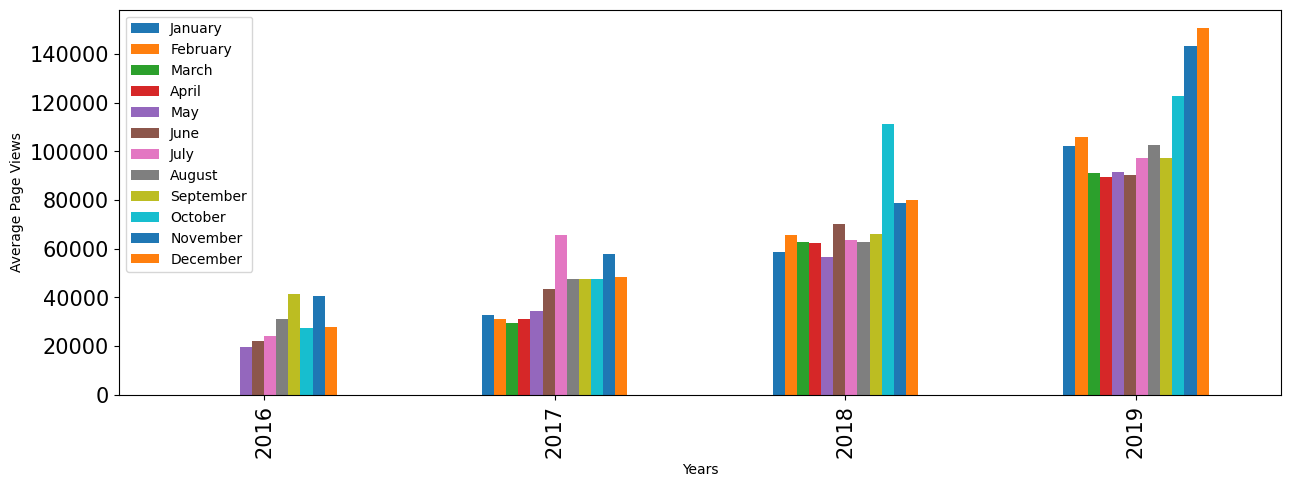

In [17]:
draw_bar_plot(pagedf)

In [21]:
def draw_box_plot(x):

  #prepare data for box plots
  df_box = x.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]

  #Boxplots
  df_box['month_num'] = df_box['date'].dt.month
  df_box = df_box.sort_values('month_num')

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))# fig is the whole figure, axes is what's inside
  axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0]) #first boxplot axes
  axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1]) #second boxplot axes

#First box plot showing values distributed by year
  axes[0].set_title('Year-wise Box Plot (Trend)')
  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Page Views')

#second box plot showing values distributed by month
  axes[1].set_title('Month-wise Box Plot (Seasonality)')
  axes[1].set_xlabel('Month')
  axes[1].set_ylabel('Page Views')


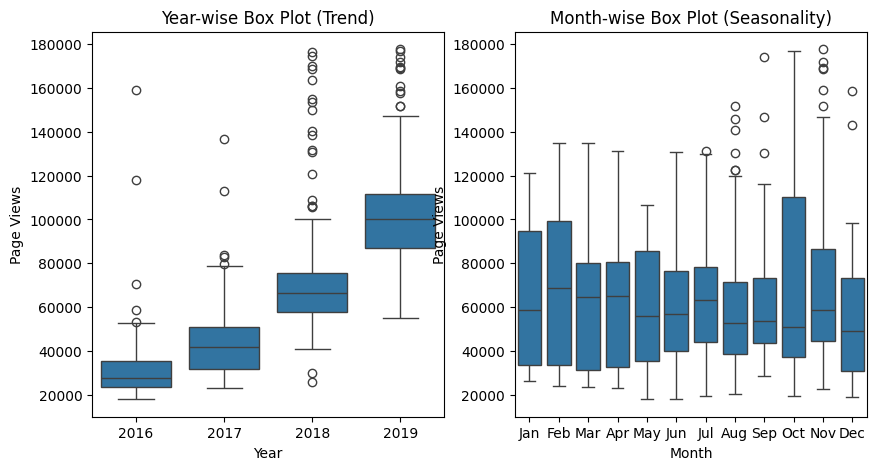

In [22]:
draw_box_plot(pagedf)